In [4]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os
import practical_test

In [6]:
path = os.path.join(os.path.dirname(os.getcwd()),'Data')
bins = [0,29,34,39,float('inf')]
labels=['up to 29','30-34','35-39','40+']
alpha = 0.05

In [7]:
df = pd.read_csv(path+os.sep+'transfery.csv')
df['vek_mother'] = pd.to_numeric(df['vek_mother'], errors='coerce')


In [8]:
df['age_group_mother']=pd.cut(df['vek_mother'],bins=bins,right=True,labels=labels)
df.dropna(subset=['vek_mother','clinical_gravidity'], inplace=True)


Index(['clinical_gravidity', 'age_group_mother'], dtype='object')


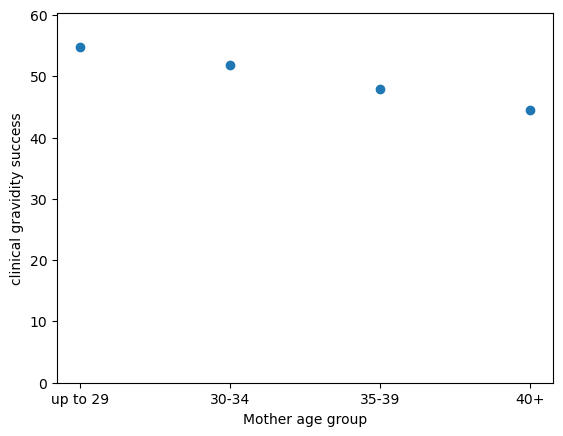

In [9]:
df,table_mother=practical_test.create_table(df=df,column_a='vek_mother',column_b='clinical_gravidity',bins=bins,result_column='age_group_mother',labels=labels)
plt.scatter(y=table_mother['clinical_gravidity'] , x=table_mother['age_group_mother'])
print(table_mother.columns)
plt.xlabel("Mother age group")
plt.ylim(0,1.1*max(table_mother['clinical_gravidity']))
plt.ylabel("clinical gravidity success")
plt.show()
#plt.savefig('age_group_mother.png')


In [10]:
p_value=practical_test.chisquare_test(df,'age_group_mother','clinical_gravidity')
print(practical_test.stat_test_summary(p_value))

Null hypothesis stating indepence of groups cannot be rejected with p-value of 0.221


Index(['clinical_gravidity', 'age_group_embryo'], dtype='object')


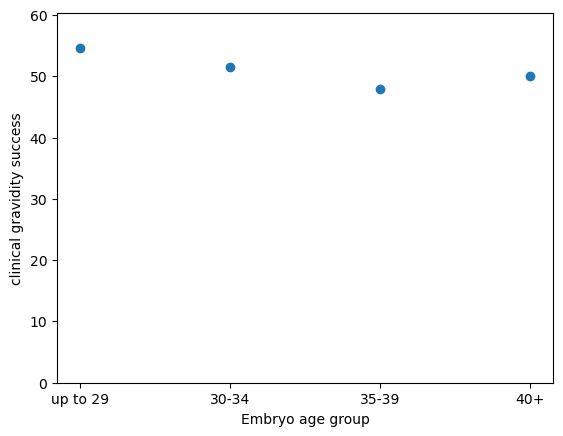

In [11]:
df = pd.read_csv(path+os.sep+'transfery.csv')
df['vek_embryo'] = pd.to_numeric(df['vek_embryo'], errors='coerce')
df=df[df['f_donor']!=1]
df,table_embryo=practical_test.create_table(df=df,column_a='vek_embryo',column_b='clinical_gravidity',bins=bins,result_column='age_group_embryo',labels=labels)
print(table_embryo.columns)
plt.scatter(y=table_embryo['clinical_gravidity'] , x=table_embryo['age_group_embryo'])
plt.xlabel("Embryo age group")
plt.ylim(0,1.1*max(table_mother['clinical_gravidity']))
plt.ylabel("clinical gravidity success")
plt.show()
#plt.savefig('age_group_embryo.png')

In [12]:
p_value=practical_test.chisquare_test(df,'age_group_embryo','clinical_gravidity')
print(practical_test.stat_test_summary(p_value))



Null hypothesis stating indepence of groups cannot be rejected with p-value of 0.58


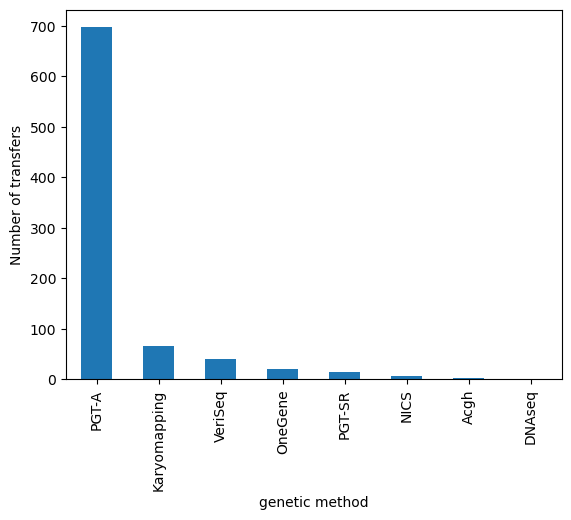

In [13]:
df = pd.read_csv(path+os.sep+'transfery.csv')
value_counts = df['genetic_method'].value_counts()
tmp=df.value_counts(subset='genetic_method')
plot = value_counts.plot(kind='bar',xlabel='genetic method',ylabel='Number of transfers')
#plt.savefig('genetic_method.png')


In [14]:
"""Extract only XY and XX values"""
df = df[(df['sex'] == 'XY') | (df['sex'] == 'XX')]
p_value = practical_test.chisquare_test(df,first_series_name='sex',second_series_name='clinical_gravidity')
print(practical_test.stat_test_summary(p_value))

Null hypothesis stating indepence of groups cannot be rejected with p-value of 0.776
